## Importing Libraries

In [2]:
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go 
import plotly.io as pio  
import plotly.colors as colors 
pio.templates.default = "plotly_white"

In [3]:
df = pd.read_csv("Sample - Superstore.csv",encoding = 'latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Descriptive Statistics of the dataset

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Convervting Date columns 

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Adding New Date-Based columns 

In [10]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of week'] = df['Order Date'].dt.dayofweek

In [11]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,6,2014,0
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,6,2014,0
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,6,2014,0
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,6,2014,0
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,6,2014,0


## 1. Monthly sales analysis

In [12]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()

In [13]:
sales_by_month                              # Monthly sales

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


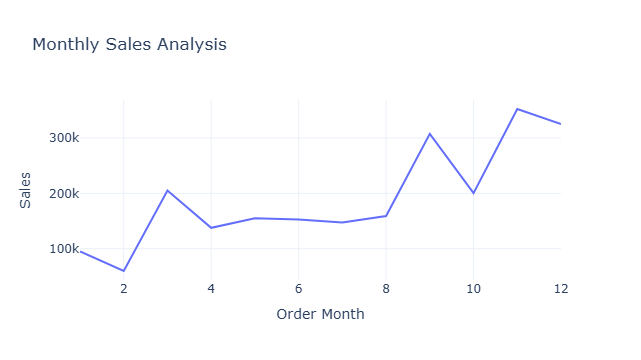

In [14]:
# Graph for Monthly sales 

fig = px.line(sales_by_month,
              x='Order Month' ,
              y='Sales' ,
              title='Monthly Sales Analysis')
fig.show()

## 2. Analysis of Sales by category 

In [15]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

In [16]:
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


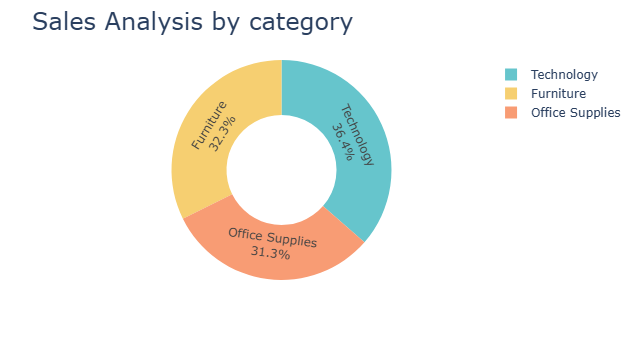

In [27]:
 # Pie chart for category sales 

fig = px.pie(sales_by_category,
             values='Sales' ,
             names='Category' ,
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside' , textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by category' , title_font=dict(size=24))

fig.show()

## 3.  Analysis of Sales by sub-category 

In [30]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()

In [31]:
sales_by_subcategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


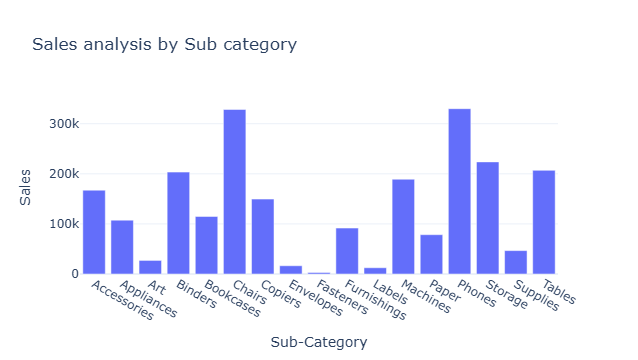

In [32]:
# Bar graph for Sales of sub-category

fig = px.bar(sales_by_subcategory,
             x= 'Sub-Category',
             y= 'Sales',
            title= 'Sales analysis by Sub category')

fig.show()

## 4. Analysis of Monthly Profit

In [35]:
profit_by_monthly = df.groupby('Order Month')['Profit'].sum().reset_index()

In [36]:
profit_by_monthly

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


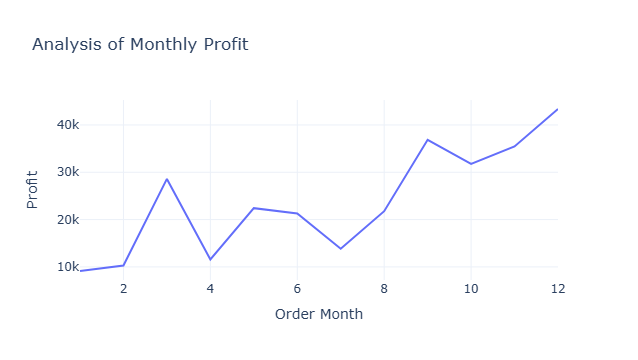

In [39]:
# Line graph for monthly profit

fig = px.line(profit_by_monthly,
             x= 'Order Month',
             y= 'Profit',
             title= 'Analysis of Monthly Profit')

fig.show()

## 5. Profit Analysis by Category

In [40]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [41]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

In [42]:
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


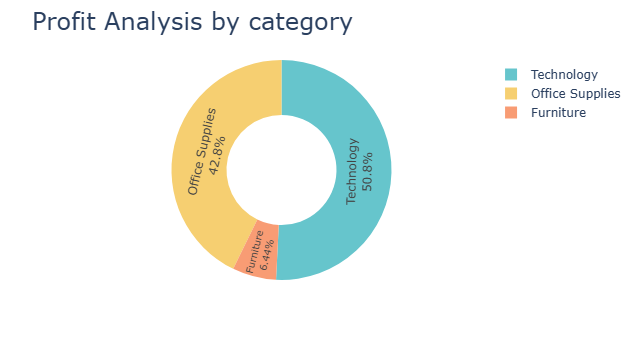

In [44]:
# Pie chart for Profit analysis by category

fig = px.pie(profit_by_category,
             values='Profit' ,
             names='Category' ,
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside' , textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by category' , title_font=dict(size=24))

fig.show()

## 6. Profit Analysis by Sub-Category

In [45]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

In [46]:
profit_by_subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


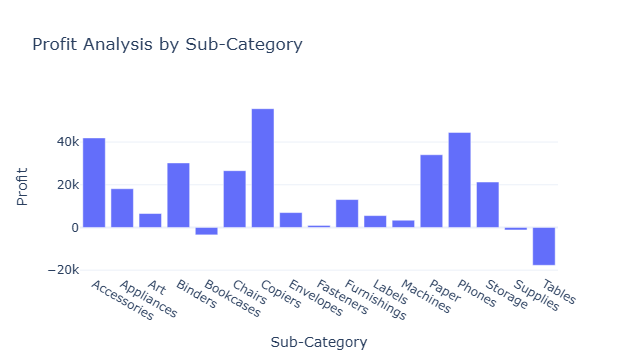

In [50]:
# Bar graph for Profit analysis by sub-category

fig = px.bar(profit_by_subcategory, x='Sub-Category', 
             y='Profit', 
             title='Profit Analysis by Sub-Category')
fig.show()

## 7. Sales and profit Analysis BY Customer Segment

In [51]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [52]:
profit_sales_by_segment = df.groupby('Segment').agg({'Sales' : 'sum' , 'Profit' : 'sum'}).reset_index()

In [53]:
profit_sales_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


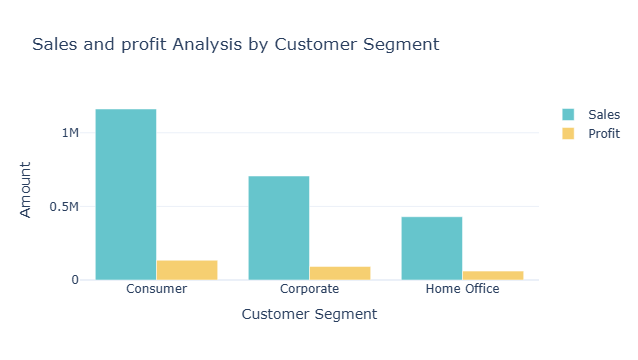

In [54]:
# Bar graph for Sales and Profit according to the segment

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x= profit_sales_by_segment['Segment'],
                    y= profit_sales_by_segment['Sales'],
                    name ='Sales',
                    marker_color=color_palette[0]))

fig.add_trace(go.Bar(x= profit_sales_by_segment['Segment'],
                    y= profit_sales_by_segment['Profit'],
                    name ='Profit',
                    marker_color=color_palette[1]))

fig.update_layout(title='Sales and profit Analysis by Customer Segment', 
                 xaxis_title= 'Customer Segment', 
                 yaxis_title= 'Amount')

fig.show()

## 8. Sales to Profit ratio Analysis 

In [55]:
profit_sales_by_segment = df.groupby('Segment').agg({'Sales' : 'sum' , 'Profit' : 'sum'}).reset_index()
profit_sales_by_segment['Sales_to_profit_Ratio'] = profit_sales_by_segment['Sales']/profit_sales_by_segment['Profit']
print(profit_sales_by_segment[['Segment' , 'Sales_to_profit_Ratio']])

       Segment  Sales_to_profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
